#### Name: Atharva Suryakant Mali | Class: TY BCA | Roll No.: 04 | DS LAB

<h1 style="text-align: center;">Experiment 8</h1>

### Create a time series forecasting model using linear regression for dataset climate, gold price and vegetable selling (use average selling price).

#### 1. Time series forecasting model for climate data set.

In [406]:
import pandas as pd
import matplotlib.pyplot as pt

In [407]:
df = pd.read_csv("delhi_climate.csv",index_col="date",parse_dates=True)

In [408]:
df

,humidity
date,
2013-01-01,84.500000
2013-01-02,92.000000
2013-01-03,87.000000
2013-01-04,71.333333
2013-01-05,86.833333
...,...
2016-12-28,68.043478
2016-12-29,87.857143
2016-12-30,89.666667


In [409]:
df.columns = ['humidity']

<Axes: xlabel='date'>

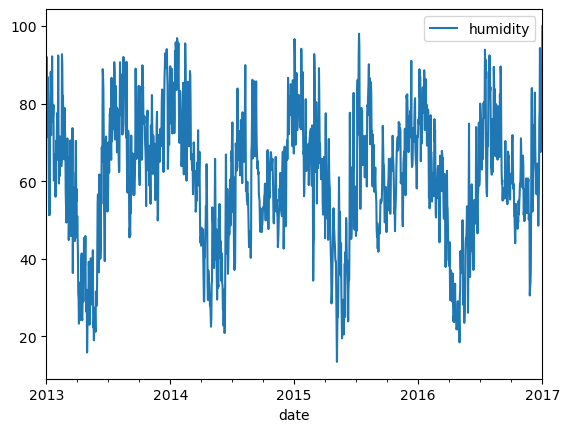

In [410]:
df.plot()

In [411]:
df['humidity_lastmonth']=df['humidity'].shift(+1)
df['humidity_2monthback']=df['humidity'].shift(+2)
df['humidity_3monthback']=df['humidity'].shift(+3)

In [412]:
df

,humidity,humidity_lastmonth,humidity_2monthback,humidity_3monthback
date,,,,
2013-01-01,84.500000,NaN,NaN,NaN
2013-01-02,92.000000,84.500000,NaN,NaN
2013-01-03,87.000000,92.000000,84.500000,NaN
2013-01-04,71.333333,87.000000,92.000000,84.500000
2013-01-05,86.833333,71.333333,87.000000,92.000000
...,...,...,...,...
2016-12-28,68.043478,67.550000,74.857143,94.300000
2016-12-29,87.857143,68.043478,67.550000,74.857143
2016-12-30,89.666667,87.857143,68.043478,67.550000


In [413]:
df=df.dropna()
df

,humidity,humidity_lastmonth,humidity_2monthback,humidity_3monthback
date,,,,
2013-01-04,71.333333,87.000000,92.000000,84.500000
2013-01-05,86.833333,71.333333,87.000000,92.000000
2013-01-06,82.800000,86.833333,71.333333,87.000000
2013-01-07,78.600000,82.800000,86.833333,71.333333
2013-01-08,63.714286,78.600000,82.800000,86.833333
...,...,...,...,...
2016-12-28,68.043478,67.550000,74.857143,94.300000
2016-12-29,87.857143,68.043478,67.550000,74.857143
2016-12-30,89.666667,87.857143,68.043478,67.550000


In [414]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [415]:
import numpy as np

In [416]:
x1,x2,x3,y = df['humidity_lastmonth'],df['humidity_2monthback'],df['humidity_3monthback'],df['humidity']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [417]:
x1, x2, x3, y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1) 

In [418]:
final_x = np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[87.         92.         84.5       ]
 [71.33333333 87.         92.        ]
 [86.83333333 71.33333333 87.        ]
 ...
 [87.85714286 68.04347826 67.55      ]
 [89.66666667 87.85714286 68.04347826]
 [87.         89.66666667 87.85714286]]


In [419]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_x[:-200],final_x[-200:],y[:-200],y[-200:]

In [420]:
len(x_train)

1259

In [421]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [422]:
prediction = linear_model.predict(x_test)
linear_model.predict([[23,12,11]])

array([[25.57282704]])

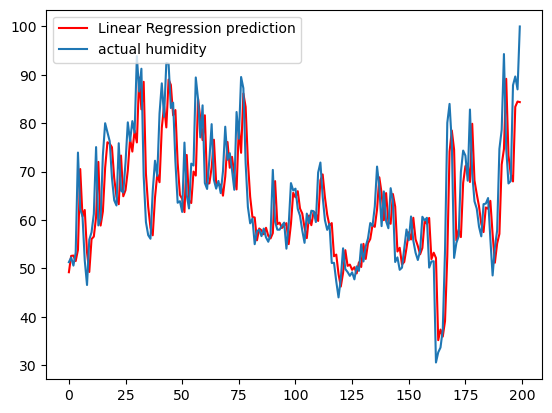

In [423]:
pt.plot(prediction, label='Linear Regression prediction',color='red')
pt.plot(y_test,label='actual humidity')
pt.legend(loc='upper left')

#### 2. Time series forecasting model for gold price data set.

In [424]:
import pandas as pd
import matplotlib.pyplot as pt

In [425]:
df = pd.read_csv("gold_price_data.csv",index_col="Date",parse_dates=True)

In [426]:
df

,Value
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


In [427]:
df.columns = ['Value']

<Axes: xlabel='Date'>

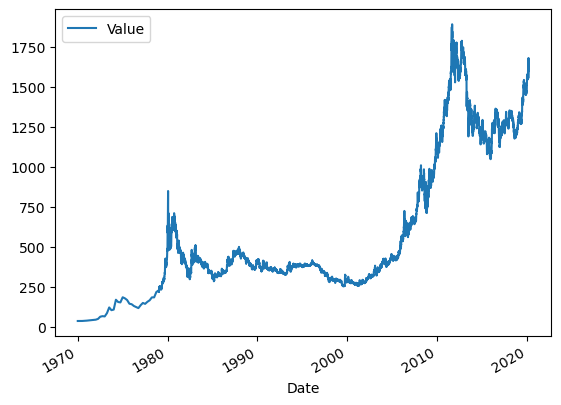

In [428]:
df.plot()

In [429]:
df['Value_lastmonth']=df['Value'].shift(+1)
df['Value_2monthback']=df['Value'].shift(+2)
df['Value_3monthback']=df['Value'].shift(+3)

In [430]:
df

,Value,Value_lastmonth,Value_2monthback,Value_3monthback
Date,,,,
1970-01-01,35.20,NaN,NaN,NaN
1970-04-01,35.10,35.20,NaN,NaN
1970-07-01,35.40,35.10,35.20,NaN
1970-10-01,36.20,35.40,35.10,35.20
1971-01-01,37.40,36.20,35.40,35.10
...,...,...,...,...
2020-03-09,1672.50,1683.65,1659.60,1641.85
2020-03-10,1655.70,1672.50,1683.65,1659.60
2020-03-11,1653.75,1655.70,1672.50,1683.65


In [431]:
df=df.dropna()
df

,Value,Value_lastmonth,Value_2monthback,Value_3monthback
Date,,,,
1970-10-01,36.20,35.40,35.10,35.20
1971-01-01,37.40,36.20,35.40,35.10
1971-04-01,38.90,37.40,36.20,35.40
1971-07-01,40.10,38.90,37.40,36.20
1971-10-01,42.00,40.10,38.90,37.40
...,...,...,...,...
2020-03-09,1672.50,1683.65,1659.60,1641.85
2020-03-10,1655.70,1672.50,1683.65,1659.60
2020-03-11,1653.75,1655.70,1672.50,1683.65


In [432]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [433]:
import numpy as np

In [434]:
x1,x2,x3,y = df['Value_lastmonth'],df['Value_2monthback'],df['Value_3monthback'],df['Value']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [435]:
x1, x2, x3, y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1) 

In [436]:
final_x = np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  35.4    35.1    35.2 ]
 [  36.2    35.4    35.1 ]
 [  37.4    36.2    35.4 ]
 ...
 [1655.7  1672.5  1683.65]
 [1653.75 1655.7  1672.5 ]
 [1570.7  1653.75 1655.7 ]]


In [437]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_x[:-200],final_x[-200:],y[:-200],y[-200:]

In [438]:
len(x_train)

10584

In [439]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [440]:
prediction = linear_model.predict(x_test)
linear_model.predict([[35.40,35.10,35.20]])

array([[35.63331644]])

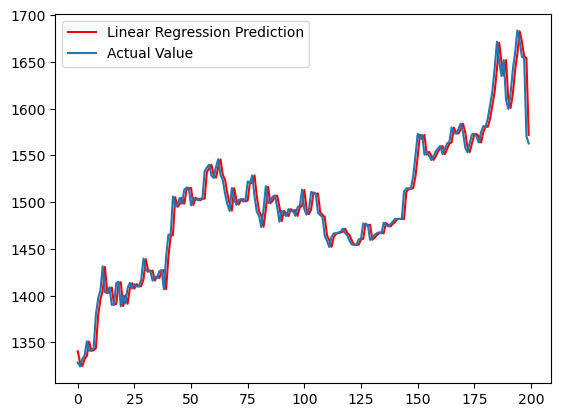

In [441]:
pt.plot(prediction, label='Linear Regression Prediction',color='red')
pt.plot(y_test,label='Actual Value')
pt.legend(loc='upper left')

#### 3. Time series forecasting model for vegetable selling data set.

In [442]:
import pandas as pd
import matplotlib.pyplot as pt

In [443]:
df = pd.read_csv("vegetable_selling_data.csv",index_col="Date",usecols=['Date','Average'],parse_dates=True)

In [444]:
df

,Average
Date,
2013-06-16,37.5
2013-06-16,29.0
2013-06-16,20.5
2013-06-16,15.5
2013-06-16,29.0
...,...
2021-05-13,110.0
2021-05-13,275.0
2021-05-13,230.0


In [445]:
df.columns = ['Average']

<Axes: xlabel='Date'>

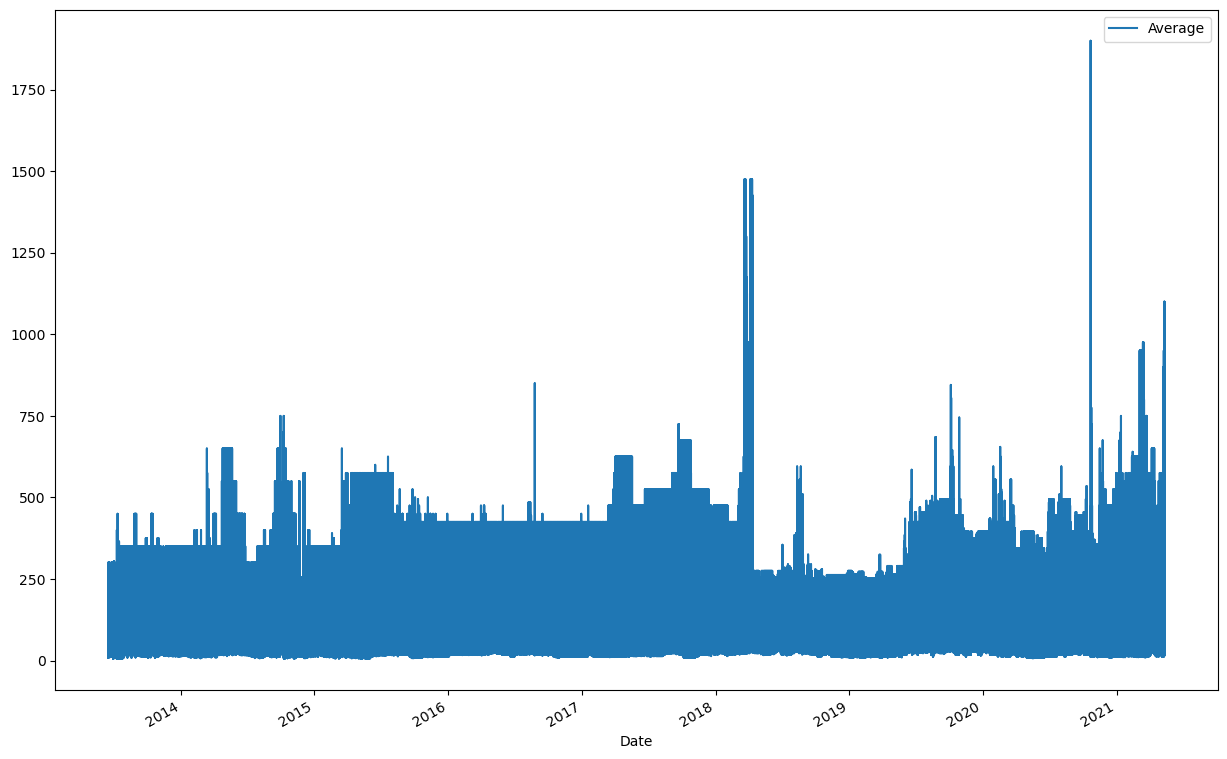

In [446]:
df.plot(figsize=(15, 10))

In [447]:
df['Average_lastmonth']=df['Average'].shift(+1)
df['Average_2monthback']=df['Average'].shift(+2)
df['Average_3monthback']=df['Average'].shift(+3)

In [448]:
df

,Average,Average_lastmonth,Average_2monthback,Average_3monthback
Date,,,,
2013-06-16,37.5,NaN,NaN,NaN
2013-06-16,29.0,37.5,NaN,NaN
2013-06-16,20.5,29.0,37.5,NaN
2013-06-16,15.5,20.5,29.0,37.5
2013-06-16,29.0,15.5,20.5,29.0
...,...,...,...,...
2021-05-13,110.0,245.0,85.0,55.0
2021-05-13,275.0,110.0,245.0,85.0
2021-05-13,230.0,275.0,110.0,245.0


In [449]:
df=df.dropna()
df

,Average,Average_lastmonth,Average_2monthback,Average_3monthback
Date,,,,
2013-06-16,15.5,20.5,29.0,37.5
2013-06-16,29.0,15.5,20.5,29.0
2013-06-16,32.5,29.0,15.5,20.5
2013-06-16,8.0,32.5,29.0,15.5
2013-06-16,32.5,8.0,32.5,29.0
...,...,...,...,...
2021-05-13,110.0,245.0,85.0,55.0
2021-05-13,275.0,110.0,245.0,85.0
2021-05-13,230.0,275.0,110.0,245.0


In [450]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [451]:
import numpy as np

In [452]:
x1,x2,x3,y = df['Average_lastmonth'],df['Average_2monthback'],df['Average_3monthback'],df['Average']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [453]:
x1, x2, x3, y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1) 

In [454]:
final_x = np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 20.5  29.   37.5]
 [ 15.5  20.5  29. ]
 [ 29.   15.5  20.5]
 ...
 [275.  110.  245. ]
 [230.  275.  110. ]
 [225.  230.  275. ]]


In [455]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_x[:-200],final_x[-200:],y[:-200],y[-200:]

In [456]:
len(x_train)

196958

In [457]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [458]:
prediction = linear_model.predict(x_test)
linear_model.predict([[20.5,29.0,37.5]])

array([[58.23433563]])

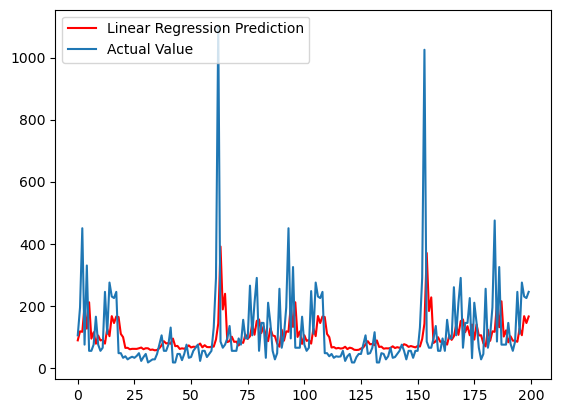

In [459]:
pt.plot(prediction, label='Linear Regression Prediction',color='red')
pt.plot(y_test,label='Actual Value')
pt.legend(loc='upper left')